# RNN Regression

## Import Module

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

## Set Parameters

In [23]:
torch.manual_seed(1) #for reproducible

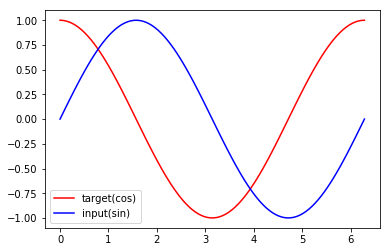

In [24]:
Time_step = 10  #similar to the width of images, but with sequence concept
input_size = 1 #input size:similar to the 
#the input size combined with time_step consist of the complete input sequence, while for each input, only 1 input the NN
lr = 0.02

#通过线性空间生成一个
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)
x_np = np.sin(steps)
y_np = np.cos(steps)
plt.plot(steps, y_np, 'r-', label='target(cos)')
plt.plot(steps, x_np, 'b-', label='input(sin)')
plt.legend(loc='best')
plt.show()

## Build Model

In [30]:
class RNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.rnn = nn.RNN(input_size=input_size, hidden_size=32, num_layers=1, batch_first=True)
        self.out = nn.Linear(32, 1)
        
    def forward(self, x, h_state):
        #x (batch, time_step, input_size)
        #h_state (n_layers, batch, hidden_size)
        #r_out (batch, time_step, output_size) --此处可以看到rnn的输出是y1 到y_timestep的多个值乘以output size
        r_out, h_state = self.rnn(x, h_state)
        outs = []
        for time_step in range(r_out.size(1)):
            outs.append(self.out(r_out[:,time_step,:]))
        return torch.stack(outs, dim=1), h_state

## Instance

In [31]:
rnn = RNN()
print(rnn)
optimizer = torch.optim.Adam(rnn.parameters(),lr=lr)
loss_func = nn.MSELoss()

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


## Training

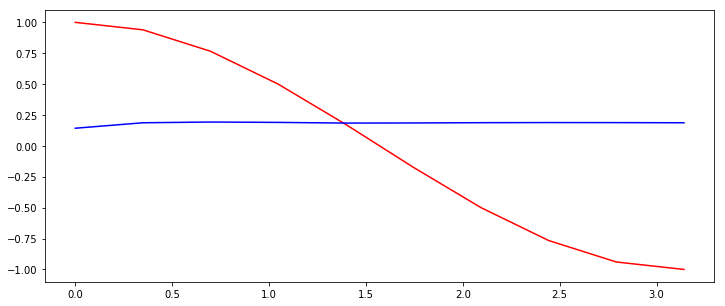

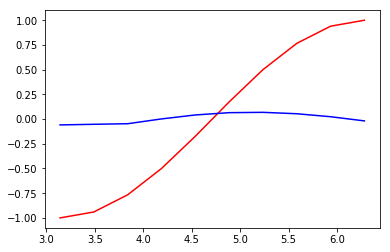

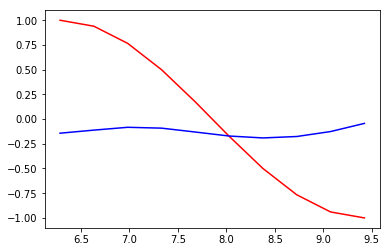

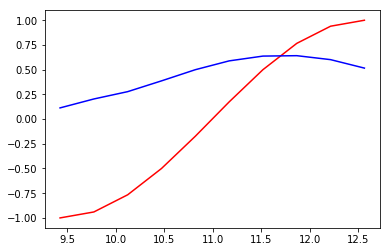

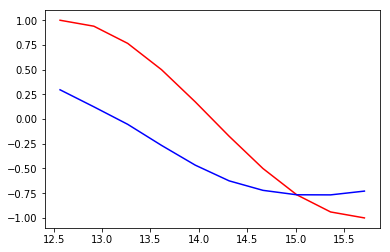

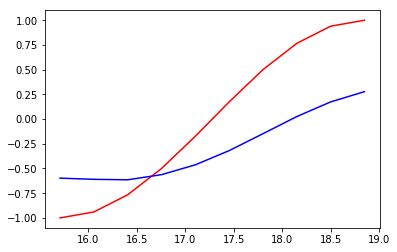

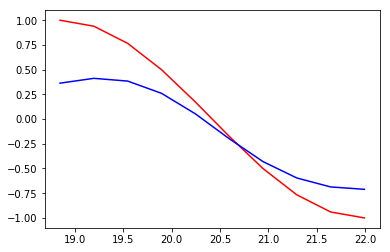

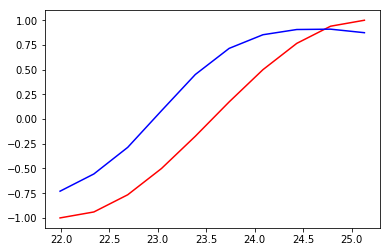

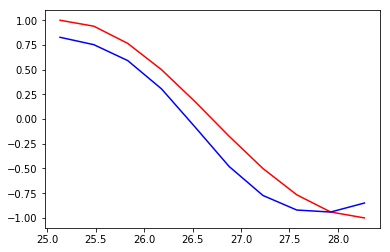

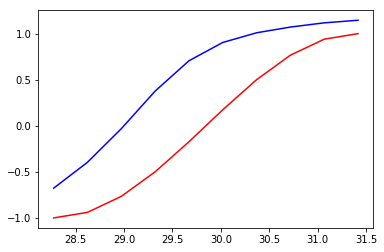

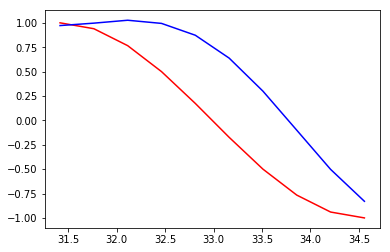

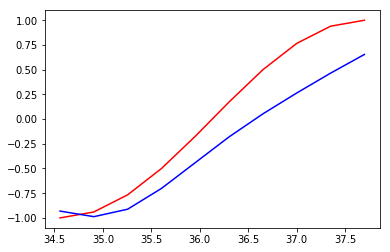

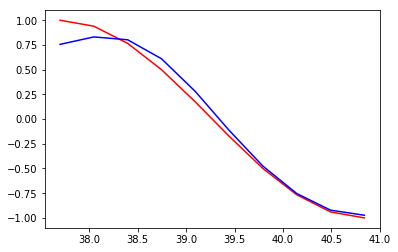

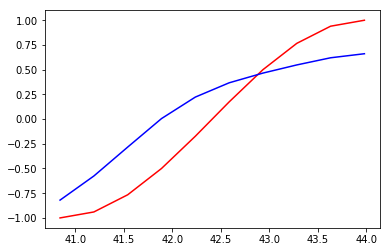

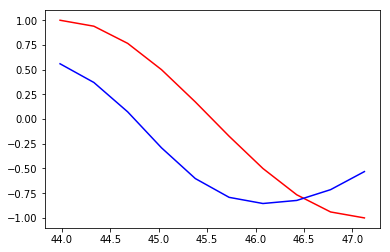

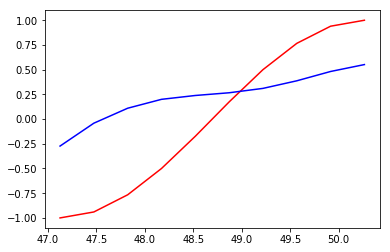

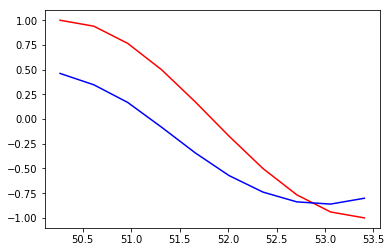

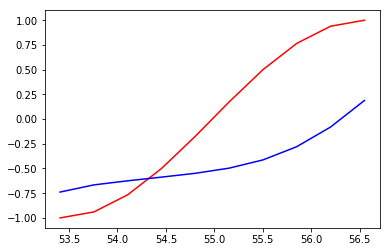

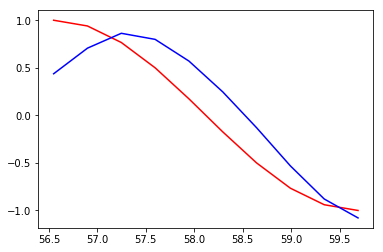

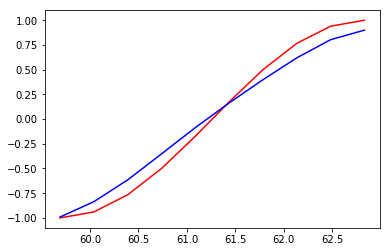

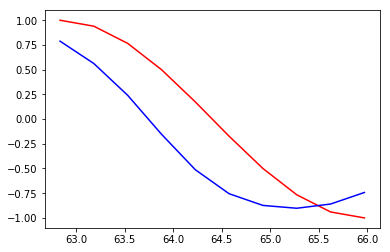

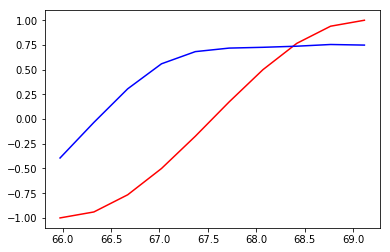

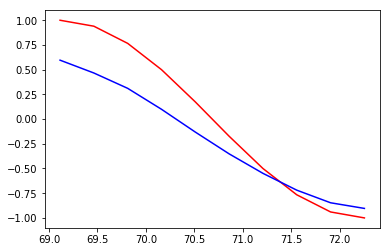

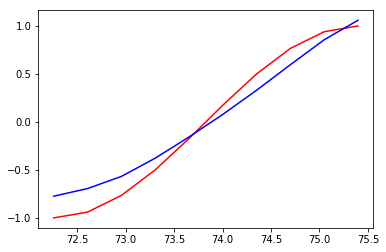

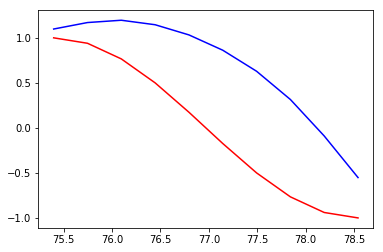

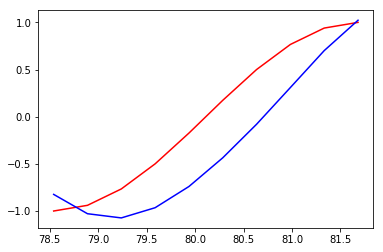

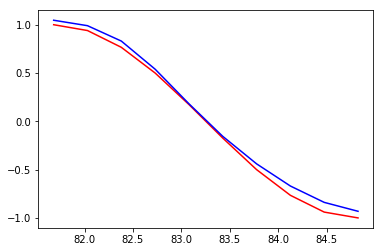

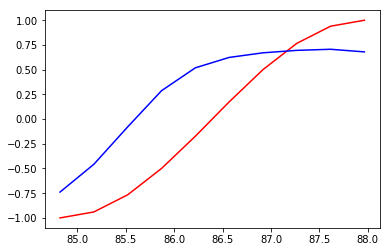

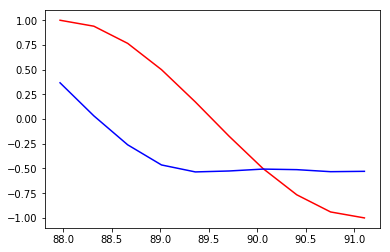

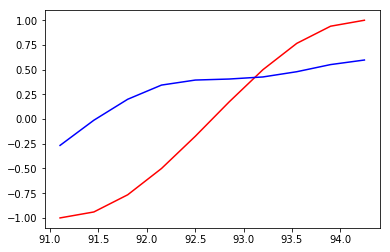

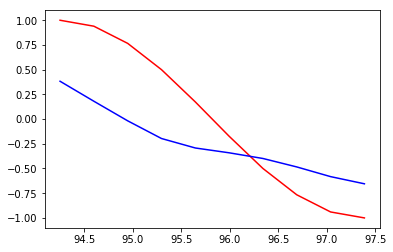

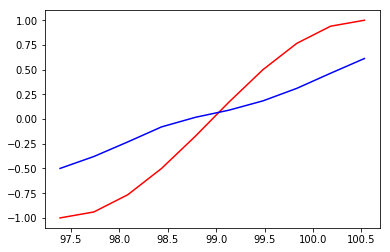

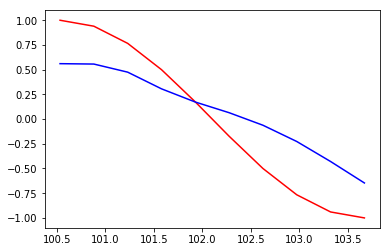

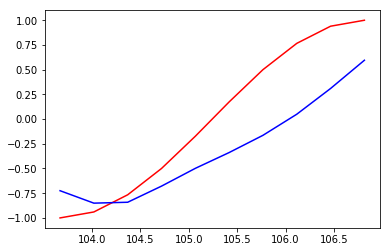

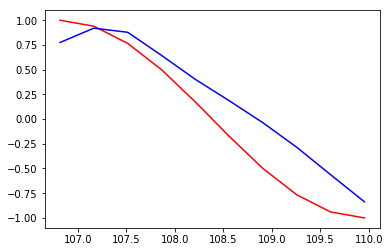

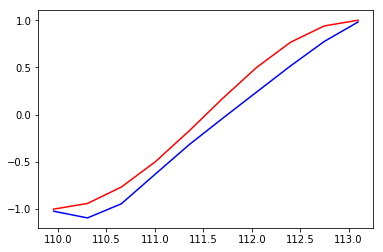

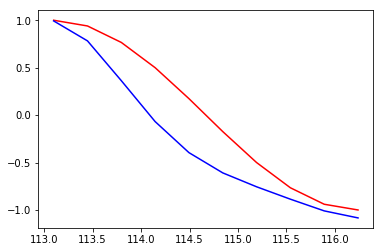

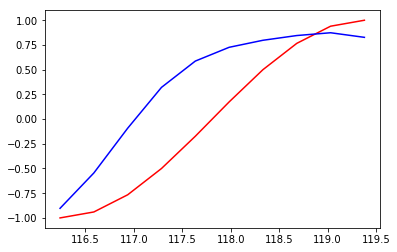

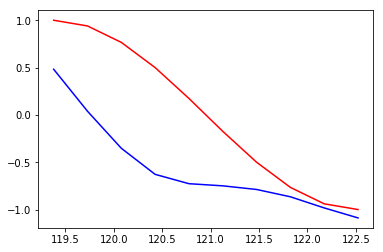

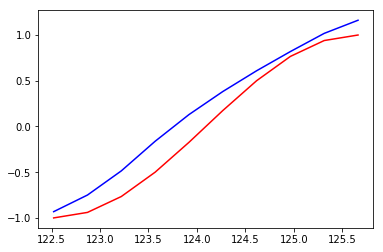

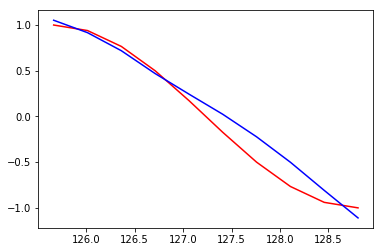

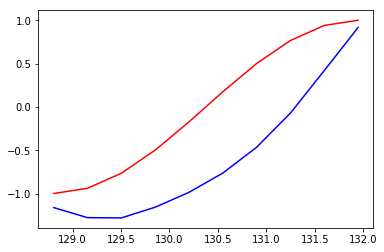

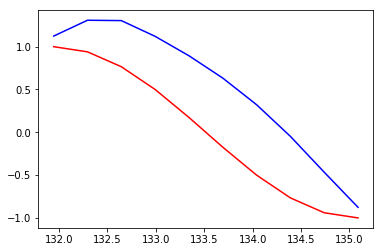

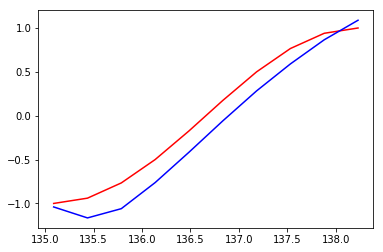

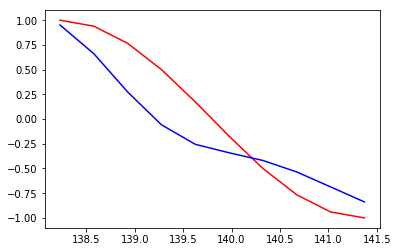

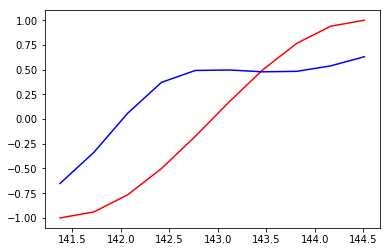

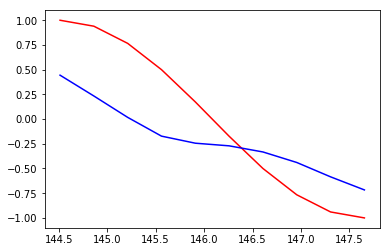

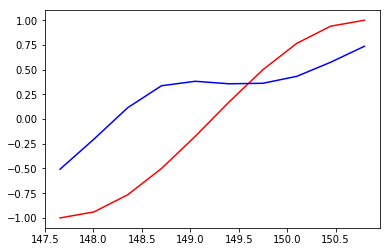

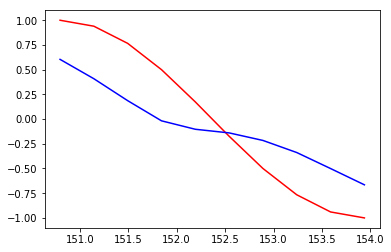

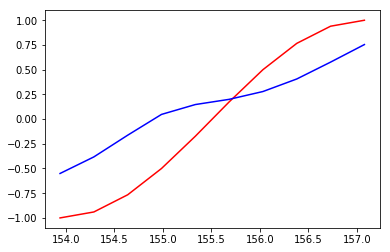

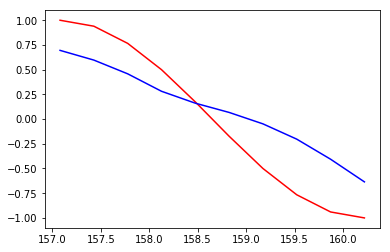

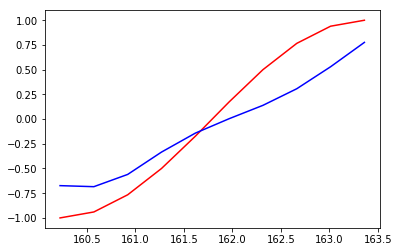

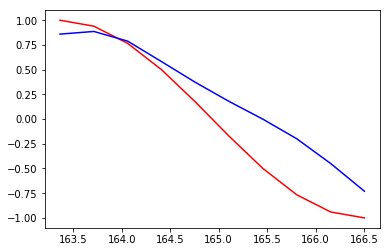

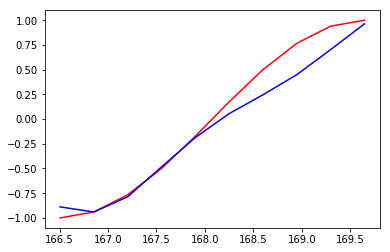

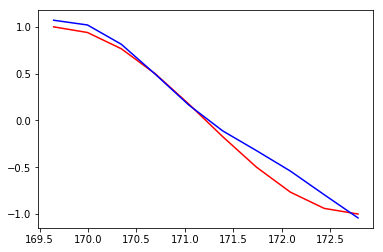

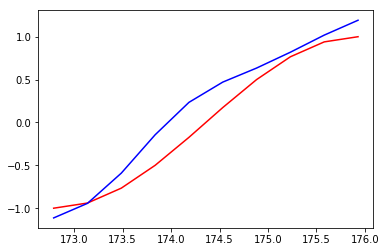

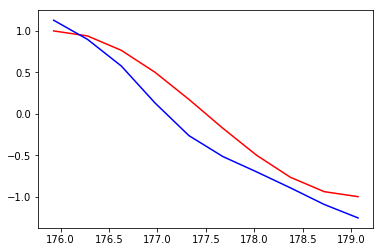

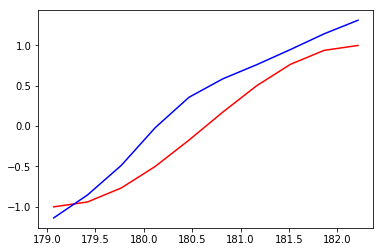

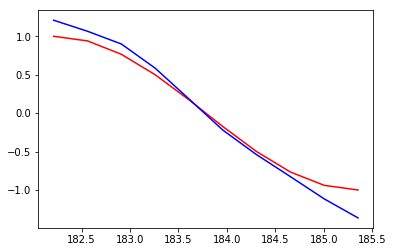

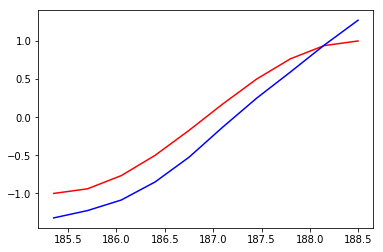

In [32]:
plt.figure(1, figsize=(12, 5))
plt.ion()           # continuously plot

#initialize the hidden state
h_state = None

for step in range(60):*
    
    #_______________________test data generate_____________________________#
    start, end = step*np.pi, (step+1)*np.pi #time steps
    #use sin predicts cos
    steps = np.linspace(start, end, Time_step, dtype=np.float32) #time_step这里是为了形成一个长度为这么多的序列
    #用以生成test数据，实际上的情况这里直接用test数据就好了
    x_np = np.sin(steps)
    y_np = np.cos(steps)
    #生成了test数据的输入和输出
    
    x = torch.from_numpy(x_np[np.newaxis,:,np.newaxis])
    y = torch.from_numpy(y_np[np.newaxis,:,np.newaxis])
    #_______________________test data generate_____________________________#
    
    prediction, h_state = rnn(x, h_state)
    h_state = h_state.data  # repack the hidden state, break the connection from last iteration
    
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #plotting
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw(); plt.pause(0.05)
    
plt.ioff()
plt.show()